In [ ]:
# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)




2.19.0


In [ ]:


# Importando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')




In [ ]:


# Carrega conjunto de dados
dados = pd.read_csv('/content/Treino.txt')
dados.head()   # Ver dados Carregados



,Diâmetro do furo (mm),Diâmetro Externo (mm),Largura B (mm),Carga Dinâmica (kN),Carga Estática (kN),Velocidade de Referência (r/min),Velocidade Limite (r/min),Vedação (m),Anel Externo (Unid),Tipo 1 a 5
0,66.1598,175.048,8862.47,0.766,0.8093,89217,33909,0.800532,1,4
1,49.4644,169.377,2730.17,0.515,0.9082,90129,24723,0.400155,9,2
2,81.8460,981.657,9544.16,0.934,0.4951,33906,68493,0.600479,5,3
3,59.5039,684.376,5072.05,0.484,0.8883,22805,53880,1.000808,3,5
4,47.2217,478.536,1949.27,0.262,0.7622,7735,13208,0.200695,7,1


In [ ]:



# Divide em Entrada e Resposta
X = dados.iloc[:,0:9]    #  Entrada
scaler = StandardScaler()  # Normaliza dos Dados
X = scaler.fit_transform(X)
X    # Ver as entradas Normalizadas



array([[ 0.59540181, -1.16554868,  1.35608754, ..., -0.62883194,
         0.66927164, -1.30277672],
       [ 0.01162623, -1.18606998, -0.71401454, ..., -0.95527487,
        -0.75195475,  1.44533501],
       [ 1.14388944,  1.75327761,  1.58620803, ...,  0.60017987,
        -0.04086199,  0.07127915],
       ...,
       [-0.00438482, -1.52933401,  1.12194992, ...,  1.26671195,
         0.670825  ,  0.07127915],
       [-0.54488267, -0.38733516, -1.30317147, ...,  0.75593857,
        -0.04002887, -1.30277672],
       [-0.33828107,  0.31614985, -1.3334957 , ...,  1.68263707,
        -0.74967227, -0.95926275]])

In [ ]:

Y1 = dados.iloc[:,9] # Resposta
# Transforma os dados
Y2 = []
for i in range(len(Y1)):
    linha = []
    for j in range(5):
      if (j+1) == Y1[i]:
        linha += [1]
      else:
        linha += [0]
    Y2.append(linha)

Y = pd.DataFrame(data=Y2,columns=['Tipo1', 'Tipo2', 'Tipo3', 'Tipo4', 'Tipo5'])

Y.head() # Ver a Resposta de Treinamento



,Tipo1,Tipo2,Tipo3,Tipo4,Tipo5
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [ ]:


# Define o Modelo
modelo = Sequential()
modelo.add(Dense(9, input_dim=9, activation='relu'))
modelo.add(Dense(5, activation='sigmoid'))
# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Treina o Modelo
resultado = modelo.fit(X, Y, batch_size = 400, epochs = 2000, verbose=0)



In [ ]:



modelo.summary()  # Mostra a rede




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422 (1.65 KB)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 282 (1.11 KB)

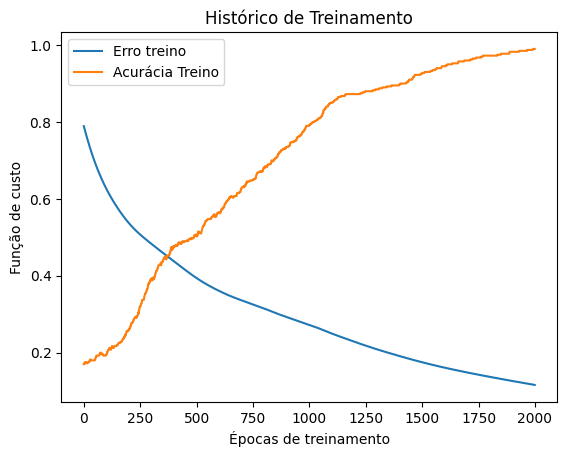

In [ ]:

# Mostra Resultado
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.show()


In [ ]:



# Carrega conjunto de teste
testes = pd.read_csv('/content/Teste.txt')
testes.head()  # Ver testes



,Diâmetro do furo (mm),Diâmetro Externo (mm),Largura B (mm),Carga Dinâmica (kN),Carga Estática (kN),Velocidade de Referência (r/min),Velocidade Limite (r/min),Vedação (m),Anel Externo (Unid)
0,16.9380,581.346,7797.45,0.897,0.2970,82749,29031,0.200444,2
1,18.0830,301.272,9500.78,0.074,0.5473,94154,95180,0.400566,1
2,45.2607,496.625,1300.09,0.436,0.5219,83996,6532,0.600666,2
3,90.9008,131.941,5343.58,0.568,0.0034,83362,79481,0.800469,9
4,45.4641,449.298,7994.23,0.141,0.8527,28049,65753,1.000814,0


In [ ]:
Xtestes = testes.iloc[:,0:9] # Entrada dos Testes
Xtestes  # Ver os testes

Xtestes = scaler.fit_transform(Xtestes)  # Normaliza dos Testes
Xtestes


array([[-1.43752933e+00,  8.72886916e-01,  9.38322212e-01,
         1.05050514e+00, -3.08351685e-01,  6.07744086e-01,
        -9.32643721e-01, -1.41417218e+00, -4.76731295e-01],
       [-1.39775020e+00, -3.37884597e-01,  1.52124341e+00,
        -1.66143253e+00,  6.81140965e-01,  9.34796050e-01,
         1.27265753e+00, -7.06712579e-01, -8.34279766e-01],
       [-4.53553590e-01,  5.06634521e-01, -1.28523332e+00,
        -4.68575378e-01,  5.80729006e-01,  6.43503296e-01,
        -1.68272419e+00,  6.68894247e-04, -4.76731295e-01],
       [ 1.13205622e+00, -1.06990953e+00,  9.85478689e-02,
        -3.36108921e-02, -1.46901905e+00,  6.25322591e-01,
         7.49278123e-01,  7.06996897e-01,  2.02610800e+00],
       [-4.46487150e-01,  3.02037938e-01,  1.00566514e+00,
        -1.44065510e+00,  1.88845641e+00, -9.60843591e-01,
         2.91608687e-01,  1.41524342e+00, -1.19182824e+00],
       [ 1.04638345e+00,  2.38857984e+00,  9.95381296e-01,
         6.55082877e-01,  4.58574300e-02,  1.008407

In [ ]:

# Testa a rede
Y_predito = modelo.predict(Xtestes)
print("Valores Preditos:",Y_predito)

Y_predito1 = np.array([])
Y_Resposta1 = np.array([])
for i in Y_predito:
    Y_parte = ([1 if max(i)==y else 0 for y in i])
    print(Y_parte)
    Y_predito1 = np.concatenate((Y_predito1,Y_parte))
    for j in range(len(Y_parte)):
      if Y_parte[j]==1:
        Resp = ([j+1])

    Y_Resposta1 = np.concatenate((Y_Resposta1,Resp))

Y_Resposta1 # Ver os Resuladados




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Valores Preditos: [[8.5716987e-01 3.8377279e-01 5.3628753e-03 2.3952913e-05 1.9275503e-05]
 [1.8250515e-01 3.3777463e-01 1.4627956e-01 1.5264659e-03 5.5801953e-05]
 [2.8486464e-03 2.0752673e-01 6.6349560e-01 1.8194123e-01 1.8499963e-03]
 [1.3079279e-04 4.8719463e-03 6.8003297e-02 7.7797502e-01 5.1782642e-02]
 [7.6210267e-06 4.9541974e-05 8.9179853e-04 6.8690583e-02 9.7901458e-01]
 [8.4410751e-01 2.1502097e-01 6.2153498e-03 1.6784419e-05 2.2724193e-05]
 [1.6954276e-01 3.5645449e-01 1.7215568e-01 2.1360286e-03 8.9354347e-05]
 [5.0605885e-03 1.4475778e-01 7.4116665e-01 1.4925916e-01 1.5701770e-03]
 [1.4906772e-04 3.4753026e-03 6.1239365e-02 7.8768319e-01 4.9100753e-02]
 [7.2827752e-06 6.2464896e-05 6.4921781e-04 6.9794387e-02 9.6241188e-01]
 [8.8108122e-01 2.4954480e-01 7.0965108e-03 2.5777774e-05 2.5981928e-05]
 [1.7536804e-01 3.1722480e-01 1.6989958e-01 1.4824140e-03 4.1310010e-05]
 [3.8311353e-03 2.1022794e-01 6.9097584e-01 1.9022933e-01 2.8460175

array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5.])

In [ ]:


Y_Resposta = pd.DataFrame(data=Y_Resposta1, dtype=np.int8, columns=['Tipo 1 a 5'])
Y_Resposta  # Ver a Resposta




,Tipo 1 a 5
0,1
1,2
2,3
3,4
4,5
5,1
6,2
7,3
8,4
9,5


In [ ]:



# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')







0B -> L1N0: 0.31181657314300537
0B -> L1N1: 1.9725333452224731
0B -> L1N2: -0.7538341879844666
0B -> L1N3: 0.6177404522895813
0B -> L1N4: 0.49979162216186523
0B -> L1N5: -1.2521060705184937
0B -> L1N6: 1.8149276971817017
0B -> L1N7: 0.5405175089836121
0B -> L1N8: 0.09129773080348969
L0N0                   -> L1N0 = 0.025492941960692406
L0N0                   -> L1N1 = -0.04147998243570328
L0N0                   -> L1N2 = 3.0102131859166548e-05
L0N0                   -> L1N3 = -0.0073944395408034325
L0N0                   -> L1N4 = -0.11845748126506805
L0N0                   -> L1N5 = 0.0001683716691331938
L0N0                   -> L1N6 = 0.08019407838582993
L0N0                   -> L1N7 = 0.01465736236423254
L0N0                   -> L1N8 = 3.3604410418774933e-06
L0N1                   -> L1N0 = -0.03713059052824974
L0N1                   -> L1N1 = -0.39480826258659363
L0N1                   -> L1N2 = -0.00024858303368091583
L0N1                   -> L1N3 = -0.07263470441102982
L0N1  